# Consensus
This file illustrates how to study consensus problems using cdcps.

In [10]:
# libraries for plotting things -----------------------
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

import numpy as np
import cdcps as cps

#### (1) Analyzing Consensus for multi-agent systems
First, we study several multi-agent systems for consensus.

In [ ]:
output_notebook()
E = [(1, 2, 0.4),
      (1, 3, 0.4),
      (2, 4, 0.5),
      (2, 5, 0.3),
      (3, 2, 0.4),
      (4, 1, 0.8),
      (5, 4, 0.3)
      ]
NET1 = cps.Graph.get_graph_from_edges(E)
NET_SYS = cps.MultiAgent.get_networked_system(graphs=[NET1])
NET_SYS.initial_state = np.array([-2, -1, 0, 1.5, 2])
NET_SYS.t_final = 30
NET_SYS.plot_consensus()

The following example illustrates how a multi-agent system behaves when the network communication is given by a series topology.

In [ ]:
A = np.array([[0.0, 0.0, 0.0, 0.0, 0.0],
              [1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 1.0, 0.0]
            ])
NET_series = cps.Graph.get_graph_from_adjacency(A)
NET_series.plot_graph("circular")
NET_SYS_series = cps.MultiAgent.get_networked_system(graphs=[NET_series])
NET_SYS_series.initial_state = np.array([-2, -1, 0, 1, 2])
NET_SYS_series.t_final = 30
NET_SYS_series.plot_consensus()

The following example illustrates how a multi-agent system behaves when the network communication is given by a ring topology.

In [ ]:
A = np.array([[0.0, 0.0, 0.0, 0.0, 1.0],
              [1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 1.0, 0.0]
            ])
NET_ring = cps.Graph.get_graph_from_adjacency(A)
NET_ring.plot_graph("circular")
# NET_ring.show_graph_data()
NET_SYS_ring = cps.MultiAgent.get_networked_system(graphs=[NET_ring])
NET_SYS_ring.initial_state = np.array([-2.2, -1.5, 0, 1, 2])
NET_SYS_ring.t_final = 30
NET_SYS_ring.plot_consensus()

For a two-dimensional system, the trajectory of the states can be illustrated within the state space.

In [ ]:
output_notebook()
A = np.array([[0.0, 0.4],
              [0.6, 0.0]
              ])
G2 = cps.Graph.get_graph_from_adjacency(A)
NET_SYS = cps.MultiAgent.get_networked_system(graphs=[G2])
NET_SYS.initial_state = np.array([-2.2, -2.5])
NET_SYS.t_final = 30
NET_SYS.plot_consensus(Xspace=True)

#### (2) Switching networked systems
Next, we consider the case where the communication in the network changes. First, we assume that all individual graphs are strongly connected.


##### (a) defining the graphs

In [2]:
# GRAPH 1 --------------------------------------
A1 = np.array([[0.0, 1.0, 0.0, 1.0],
               [1.0, 0.0, 1.0, 0.0],
               [0.0, 1.0, 0.0, 0.0],
               [1.0, 0.0, 0.0, 0.0]
               ])
NET1 = cps.Graph.get_graph_from_adjacency(A1)
# # GRAPH 2 --------------------------------------
A2 = np.array([[0.0, 0.0, 1.0, 0.0],
               [0.0, 0.0, 1.0, 0.0],
               [1.0, 1.0, 0.0, 1.0],
               [0.0, 0.0, 1.0, 0.0]
               ])
NET2 = cps.Graph.get_graph_from_adjacency(A2)
# # GRAPH 3 --------------------------------------
A3 = np.array([[0.0, 1.0, 1.0, 1.0],
               [1.0, 0.0, 0.0, 0.0],
               [1.0, 0.0, 0.0, 0.0],
               [1.0, 0.0, 0.0, 0.0]
               ])
NET3 = cps.Graph.get_graph_from_adjacency(A3)
#                0     1     2
graph_list = [NET1, NET2, NET3]

##### (b) show properties and create a system union

                    graph 1    graph 2    graph 3
------------------  ---------  ---------  ---------
weight_balanced     True       True       True
strongly_connected  True       True       True
spanning_tree       True       True       True


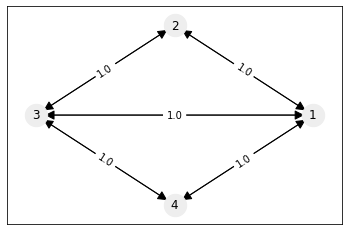

The graph union is strongly connected: True


In [9]:
cps.MultiAgent.show_switching_data(graph_list)
NET_tot = cps.Graph.get_graph_from_union(graph_list)
NET_tot.plot_graph("circular")
print("The graph union is strongly connected: " + str(NET_tot.strongly_connected))

##### (c) defining the switching function

In [ ]:
T_samp = 1
time_grid = range(0,4,T_samp)
sigma_val = np.tile([0, 1],100)[:len(time_grid)]
default_graph = 0
sigma = cps.Signals.get_PC_Function(time_grid, sigma_val, default_graph)